In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
## Read the csv file using pandas
file_path = os.path.join(os.getcwd(), 'spam.csv')
df = pd.read_csv(file_path)

## show the head of the DF
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df['spam']  = df['Category'].apply(lambda x : 1 if x=='spam' else 0)

In [7]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Text(0.5, 1.0, 'Classification of Dataset')

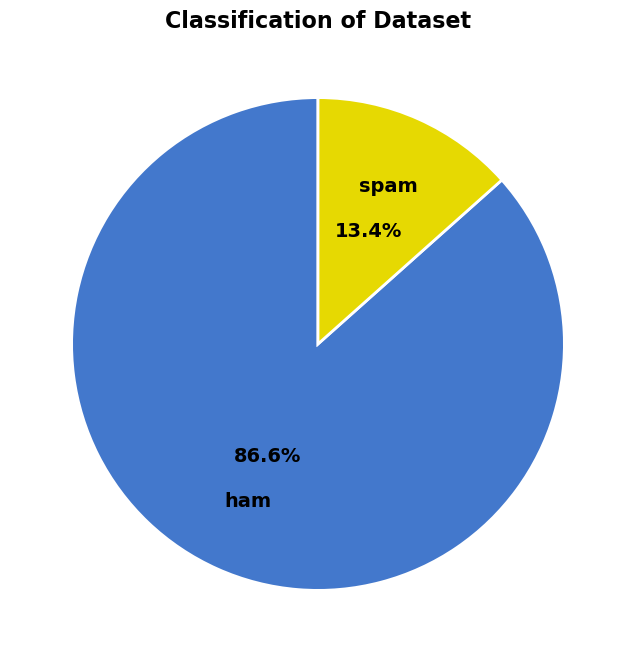

In [10]:
pie_df = df['Category'].value_counts().reset_index()


plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(pie_df['count'], 
                                    labels=['ham', 'spam'], 
                                    autopct='%1.1f%%', 
                                    textprops={'fontsize':12},
                                    startangle = 90, 
                                    labeldistance=0.7,
                                    pctdistance=0.5,
                                    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
                                    colors=['#4378cc','#e6d902'])

# Customize text labels
for text in texts:
    text.set_horizontalalignment('center')
    text.set(size=14, weight='bold')
# Customize percent labels
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set(size=14, weight='bold')

    
plt.title("Classification of Dataset",fontsize=16, fontweight='bold')

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.Message , df.spam, test_size = 0.2)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [13]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('nb' , MultinomialNB())
])

In [14]:
clf.fit(x_train , y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [15]:
clf.score(x_test , y_test)

0.9748878923766816

In [16]:
emails = [
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!' ,
     'مسابقات وجوائز مالية قيّمة بانتظارك في مختلف المجالات'
]
clf.predict(emails)

array([1, 0], dtype=int64)